## Demo of LOF/GOF

outlierの近傍に別のoutlierがある場合、相対的にLOFが小さくなってしまう不具合がある。
従って、「最も品質の高いクラスタの密度」で正規化したGOFを定義する。

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 96


from src.constant import EEG_PROBES, PROBES
from src.preprocess import load_eeg, process_eeg, process_cqf
from src.visualization import plot_eeg

plt.style.use("tableau-colorblind10")

In [2]:
data_dir = Path("../../../input/hms-harmful-brain-activity-classification")
metadata = pl.read_csv(data_dir / "train.csv")

In [3]:
def display_lqf_demo(
    eeg_id: int,
    data_dir: Path,
    return_df=False,
    offset_sec=0,
    sampling_rate=40,
    duration_sec=50,
):
    eeg_df = load_eeg(eeg_id, data_dir)
    eeg, pad_mask = process_eeg(eeg_df)
    eeg = eeg[offset_sec * sampling_rate : (offset_sec + duration_sec) * sampling_rate]
    eeg_df = pl.DataFrame({probe: pl.Series(v) for probe, v in zip(PROBES, eeg.T)})
    eeg_df = process_cqf(eeg_df)

    _, (ax1, ax2, ax4, ax5) = plt.subplots(4, 1, figsize=(12, 12))
    for p in EEG_PROBES:
        ax1.plot(eeg_df[f"{p}-org"], lw=0.5, label=p, alpha=0.5)
        ax2.plot(eeg_df[f"GOF-{p}"], lw=2, label=f"GOF-{p}", alpha=0.5)
        ax4.plot(eeg_df[f"mask-{p}"], lw=2, label=f"GOF-{p}", alpha=0.5)
        ax5.plot(eeg_df[f"CQF-{p}"], lw=2, label=f"CQF-{p}", alpha=0.5)

    for ax in ax1, ax2, ax4, ax5:
        ax.legend(ncol=2, loc="upper left", bbox_to_anchor=(1, 1))

    ax2.set_yscale("log")
    ax1.set_title(f"EEG Raw: {eeg_id}")
    ax2.set_title("Global Outlier Factor (GOF)")
    ax4.set_title("Mask")
    ax5.set_title("Channel Quality Factor (CQF)")

    ax5.set_ylim(-0.1, 1.1)
    plt.tight_layout()
    plt.show()

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    plot_eeg(
        eeg_df,
        ax=ax1,
        display_all_series=False,
        down_sampling_rate=1,
        sampling_rate=sampling_rate,
    )
    plot_eeg(
        eeg_df.with_columns(pl.col(f"{p}-org").alias(p) for p in EEG_PROBES),
        ax=ax2,
        use_mask=True,
        display_all_series=False,
        down_sampling_rate=1,
        sampling_rate=sampling_rate,
    )
    ax1.set(title="EEG Raw")
    ax2.set(title="EEG Corrected")
    plt.suptitle(f"eeg_id={eeg_id}", fontsize=14)
    plt.show()

    if return_df:
        return eeg_df

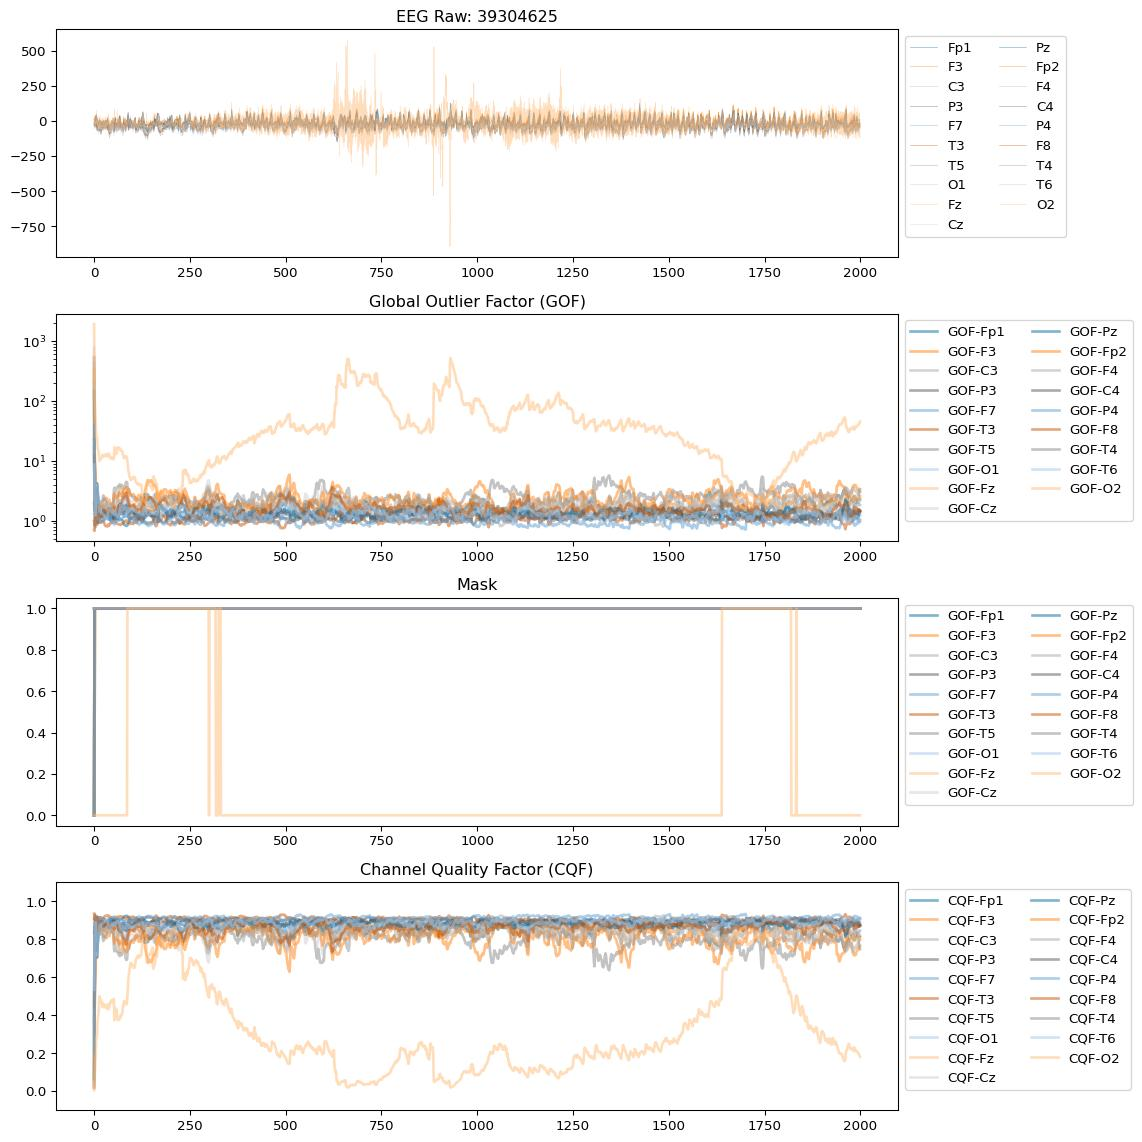

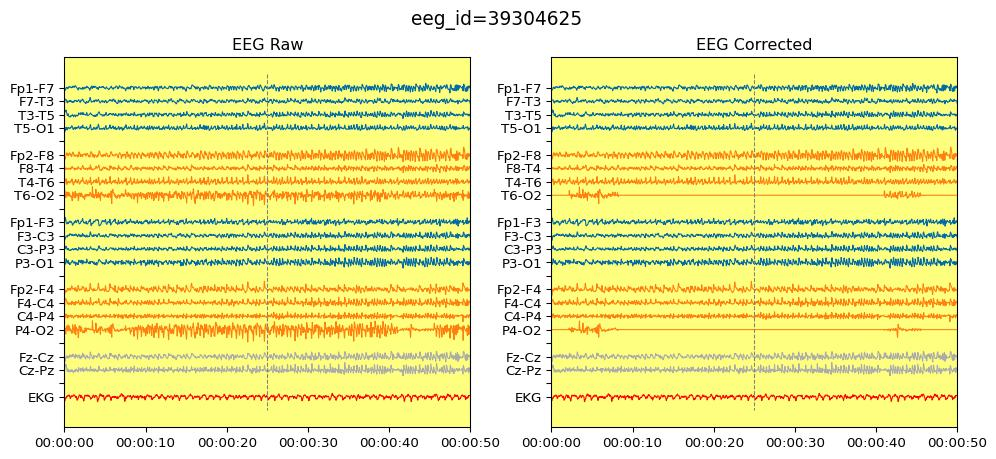

In [4]:
display_lqf_demo(39304625, data_dir)

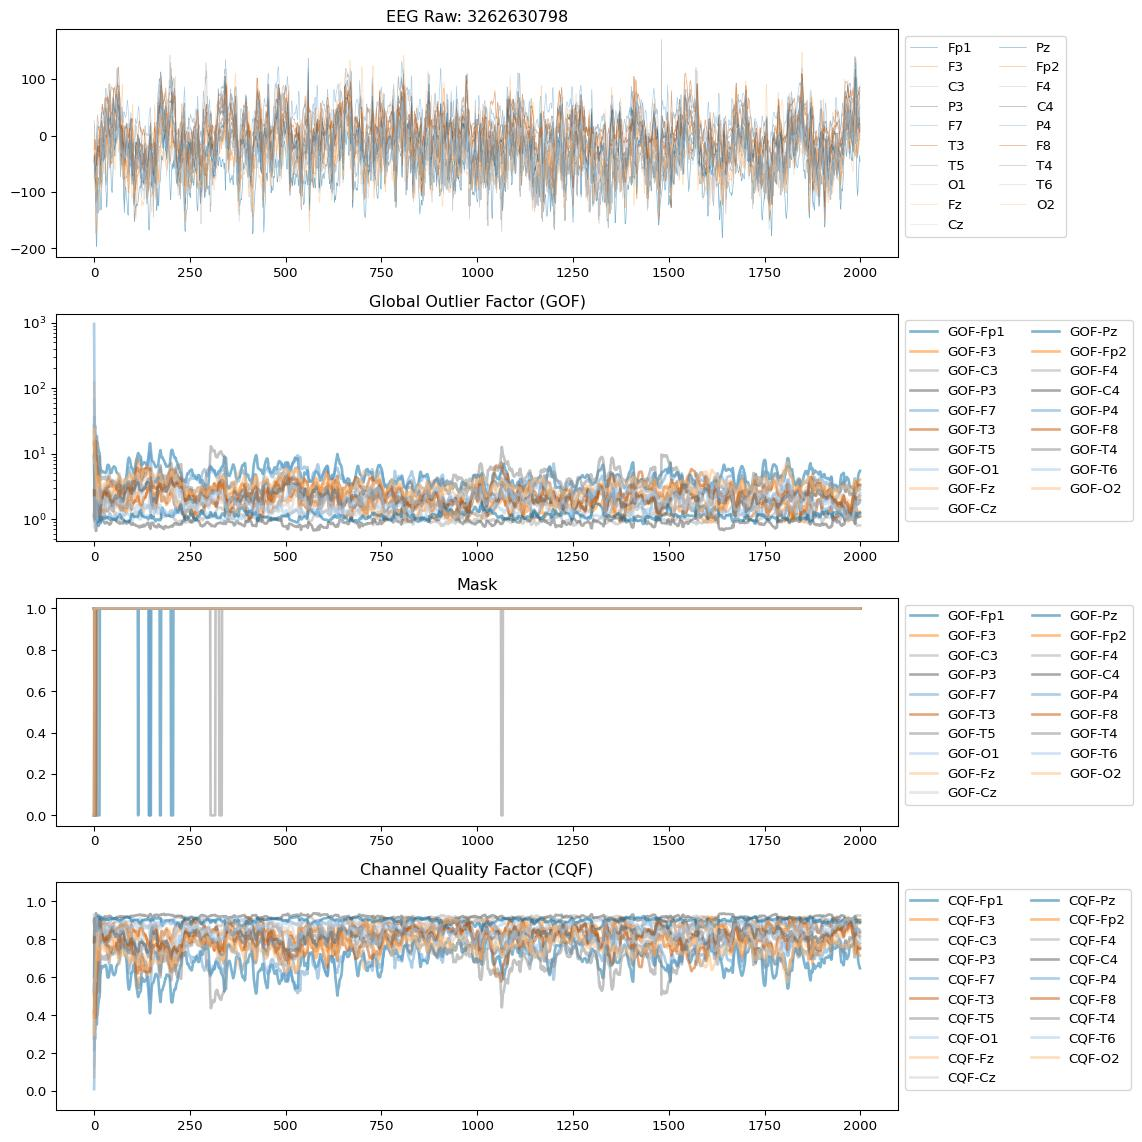

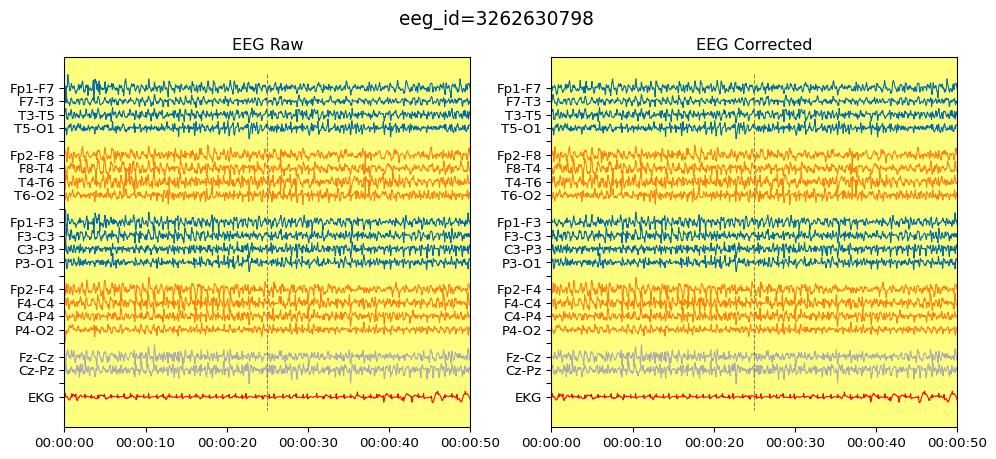

In [5]:
display_lqf_demo(3262630798, data_dir)

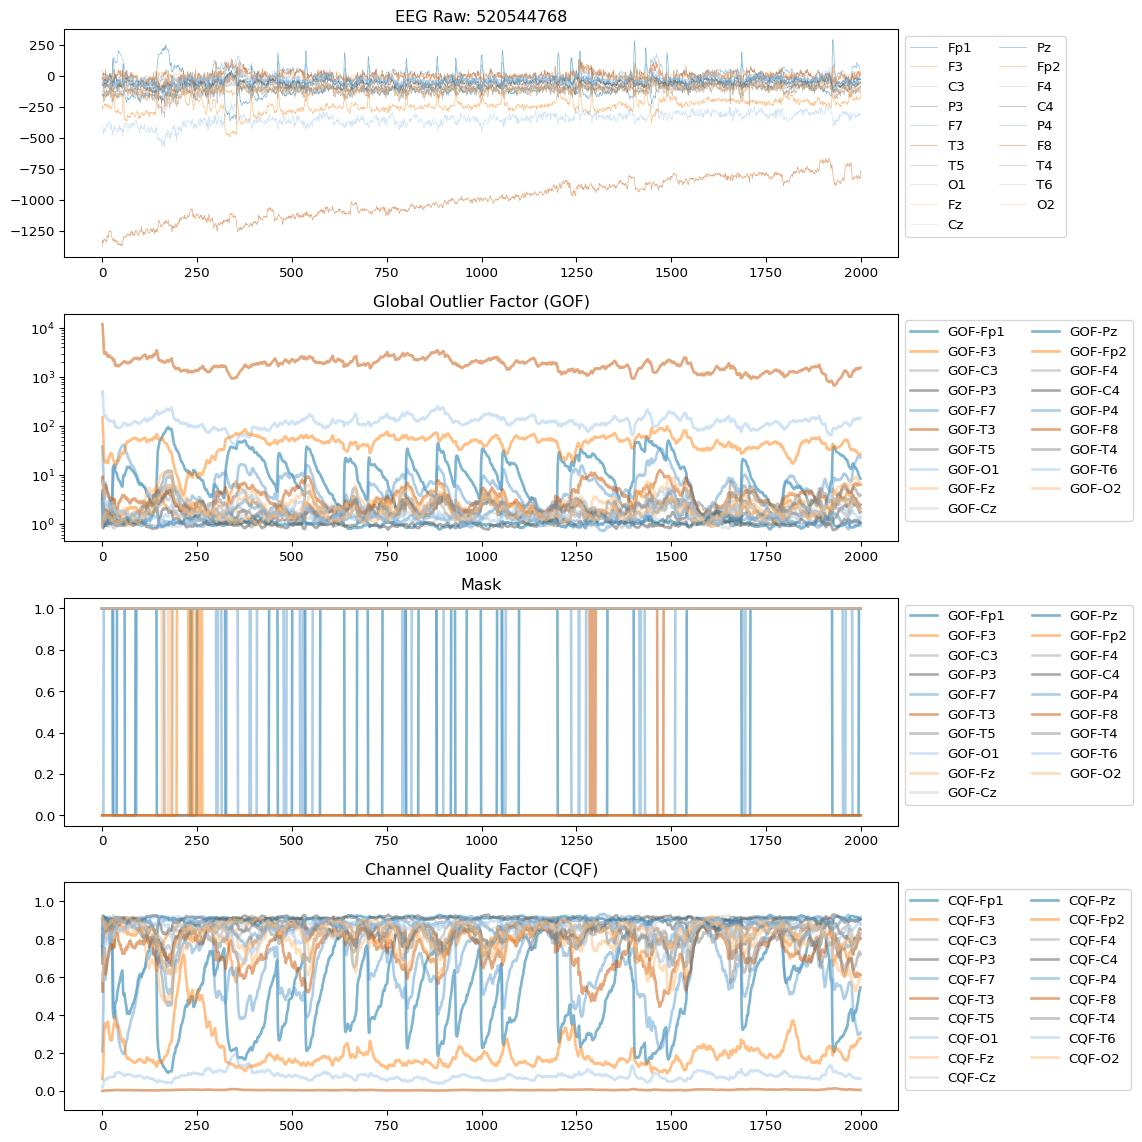

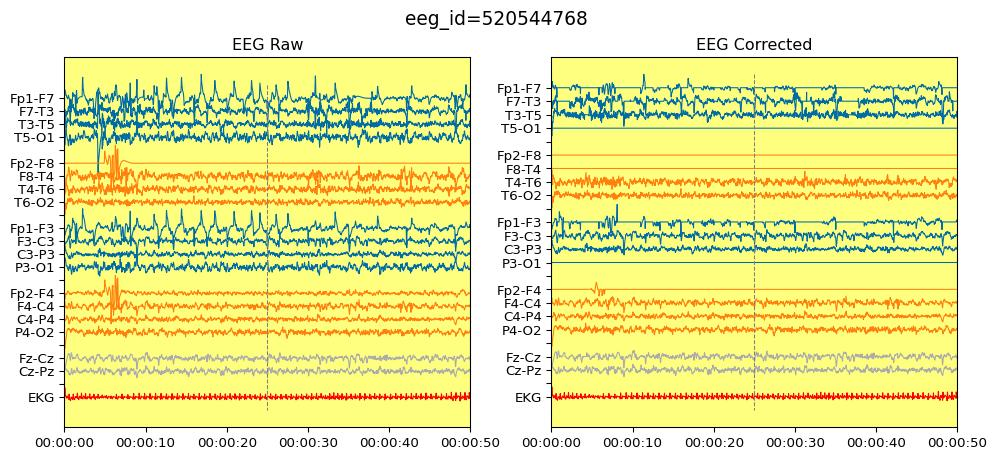

In [6]:
display_lqf_demo(520544768, data_dir)

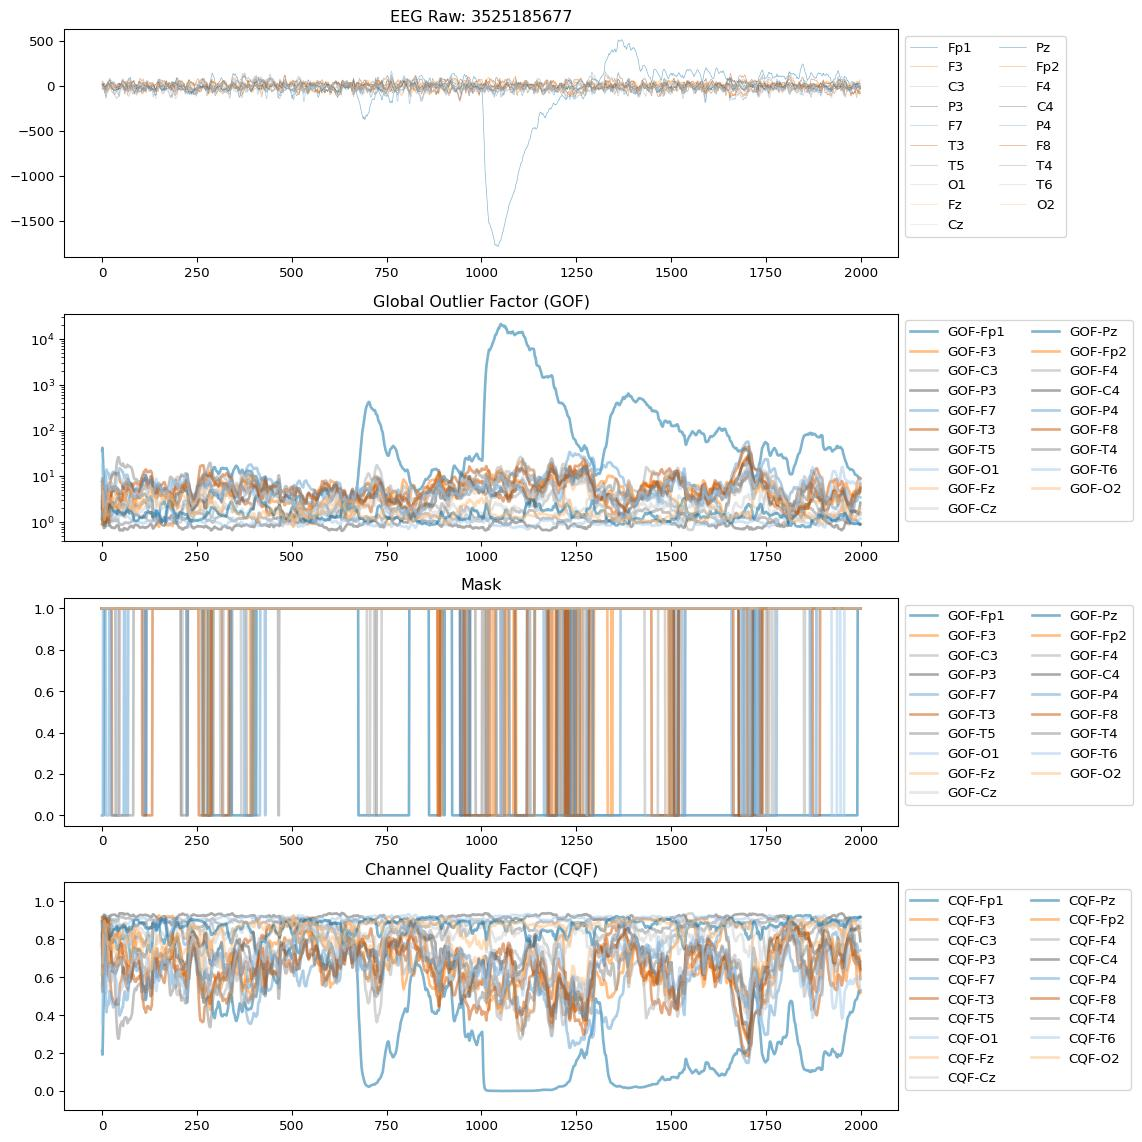

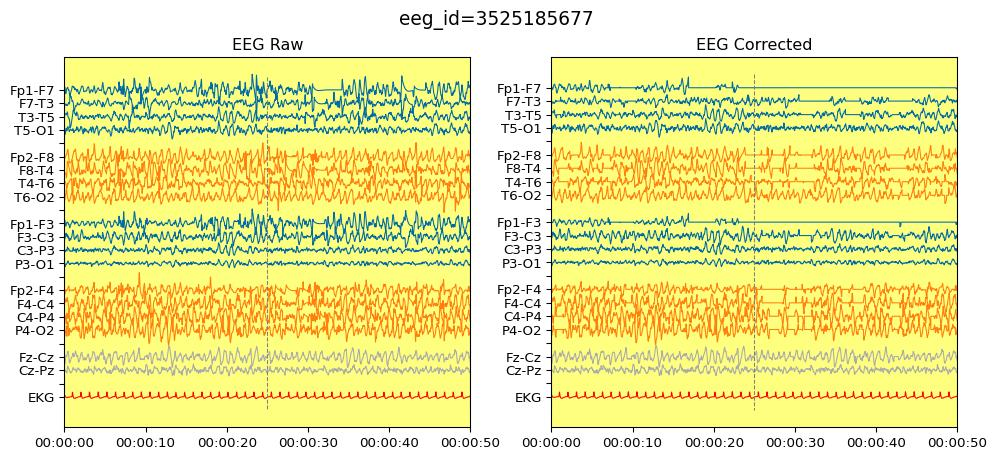

In [7]:
display_lqf_demo(3525185677, data_dir, offset_sec=66000//200)

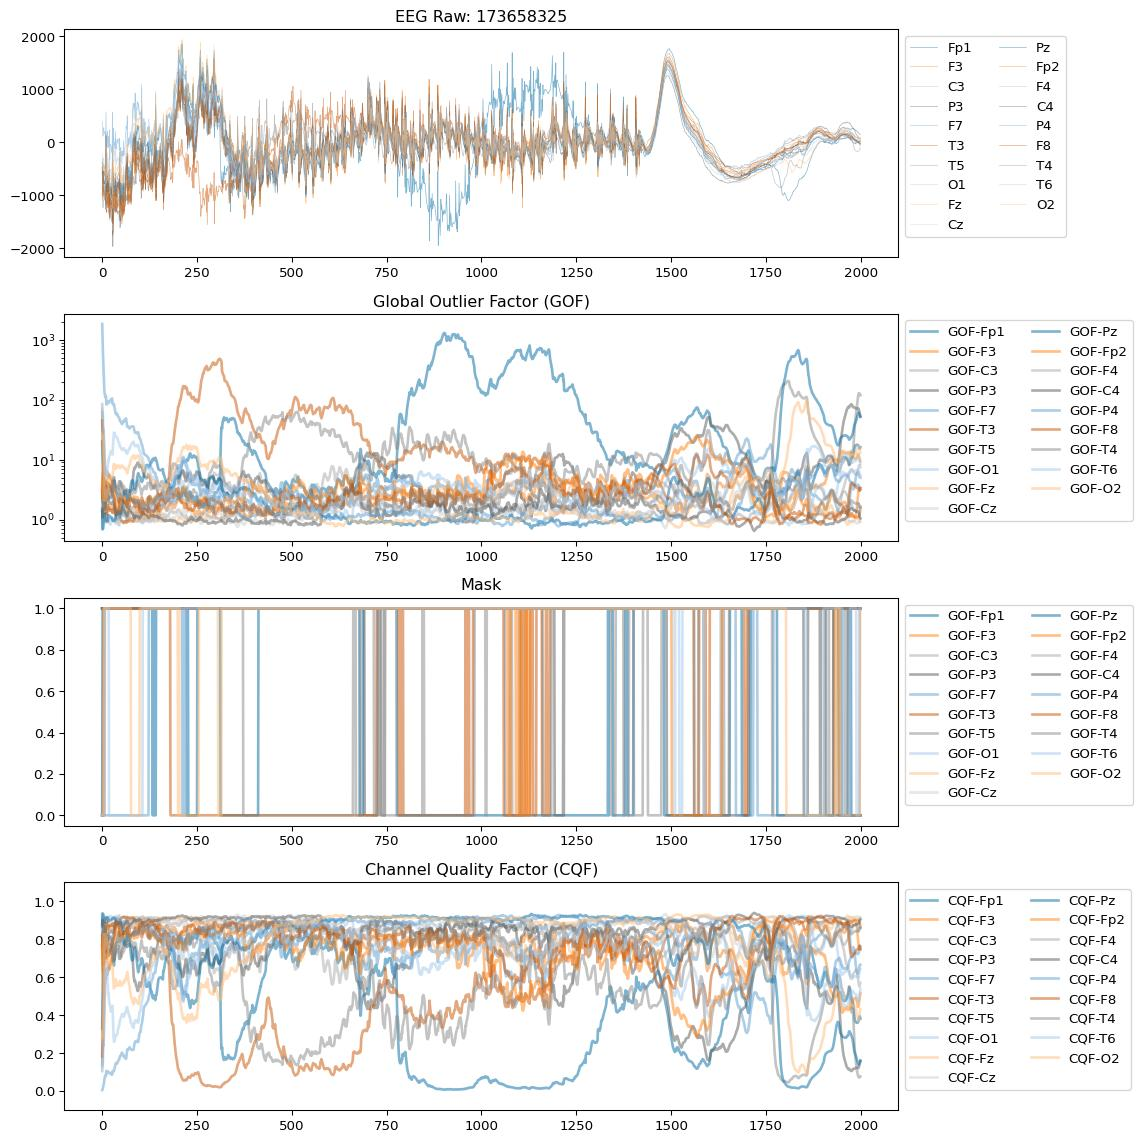

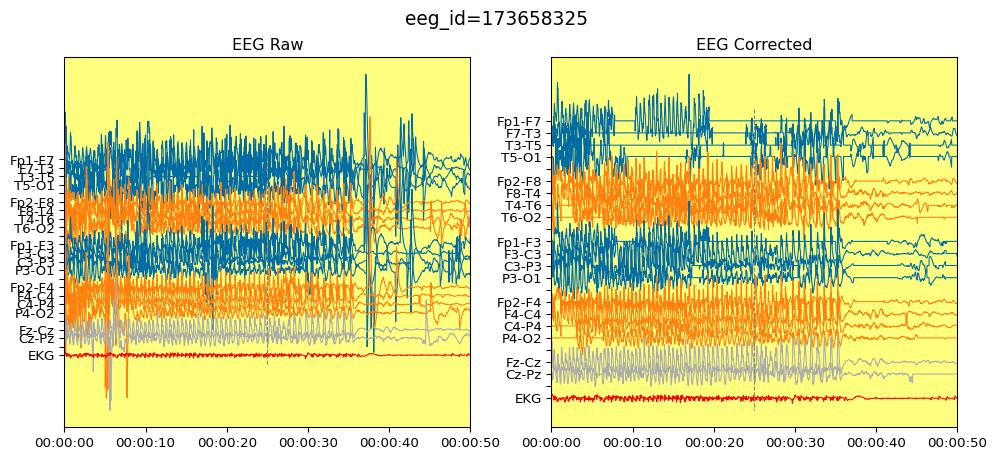

In [8]:
display_lqf_demo(173658325, data_dir, offset_sec=25000//200)

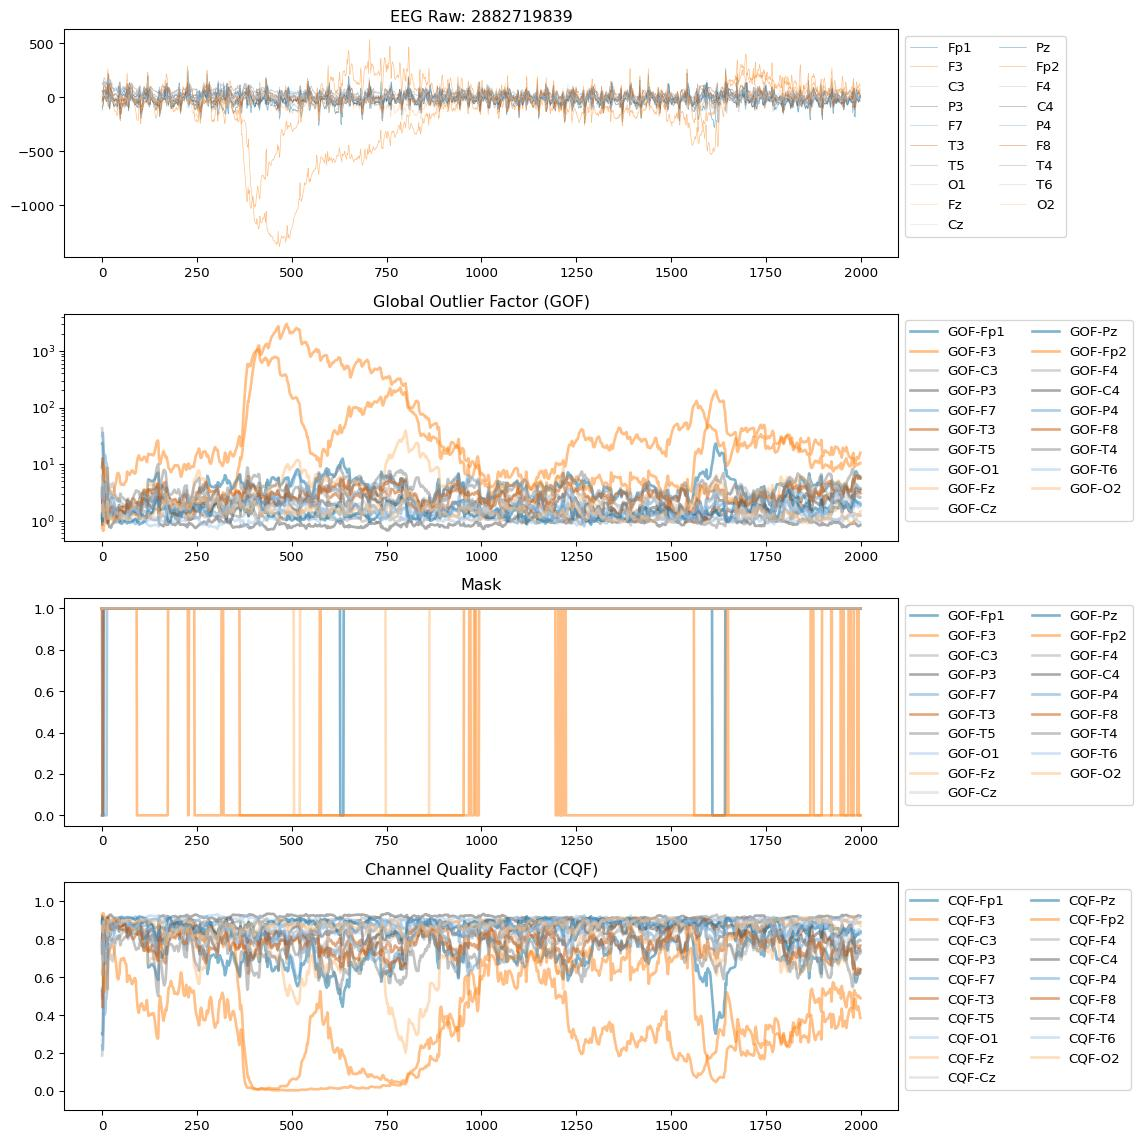

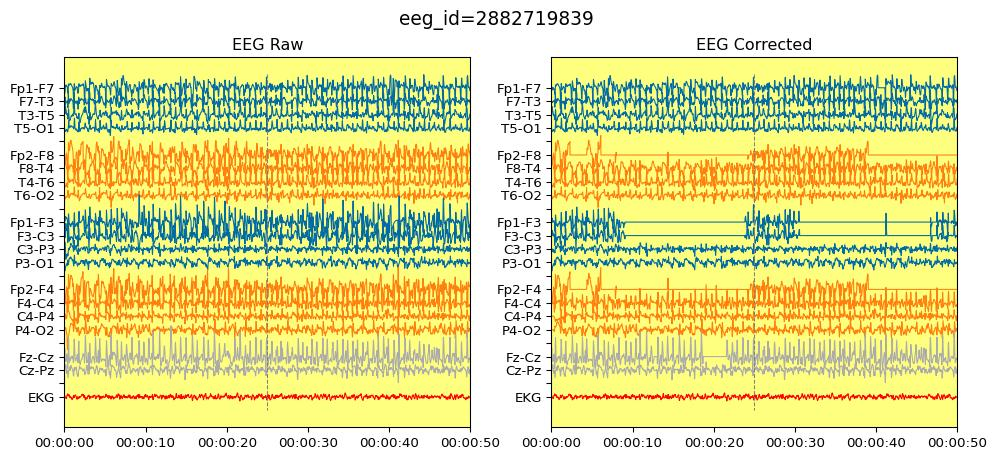

In [9]:
display_lqf_demo(2882719839, data_dir, offset_sec=20_000 // 200)

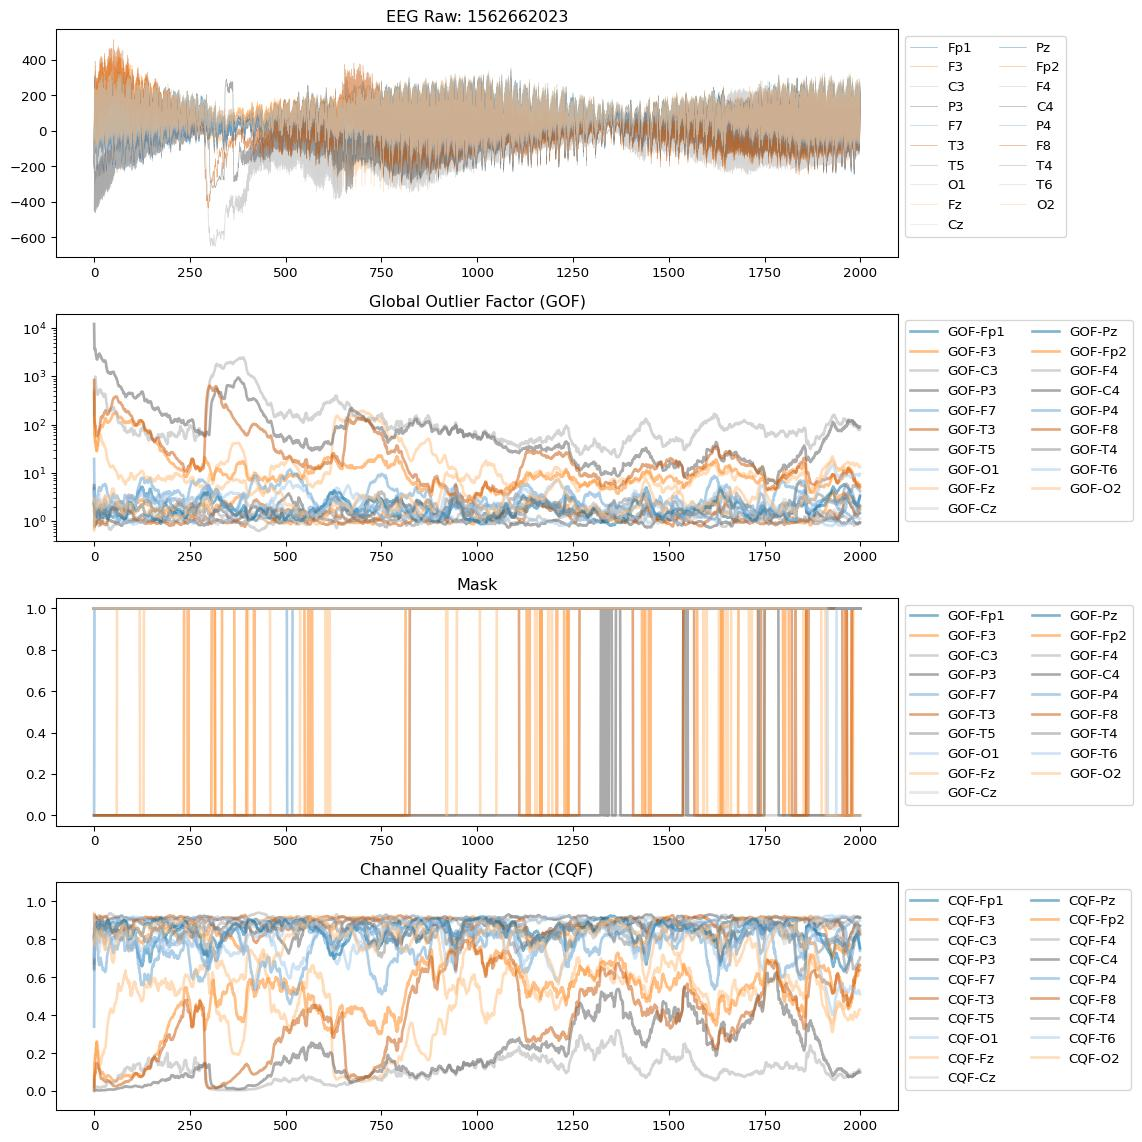

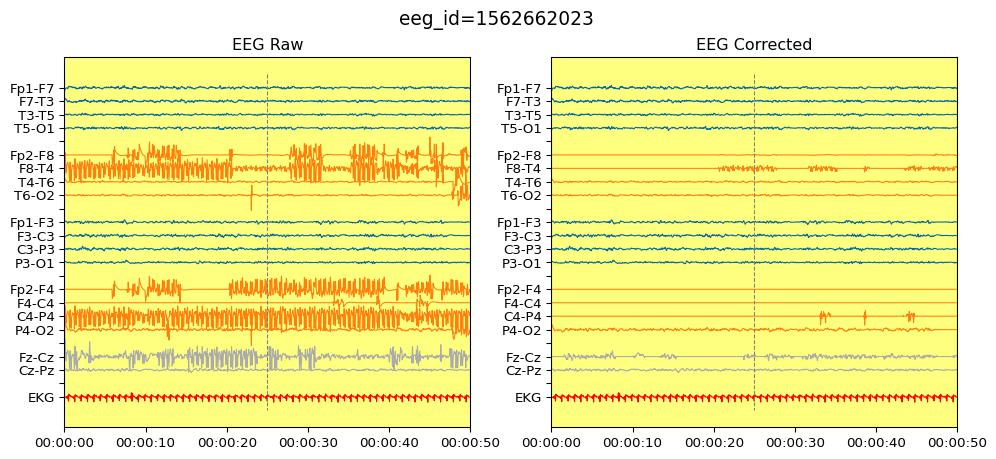

In [10]:
display_lqf_demo(1562662023, data_dir, offset_sec=0)

/ml-docker/working/kaggle-hms-bilzard/src/preprocess.py:61: RuntimeWarning: Mean of empty slice
  x = np.nanmean(x, axis=1)


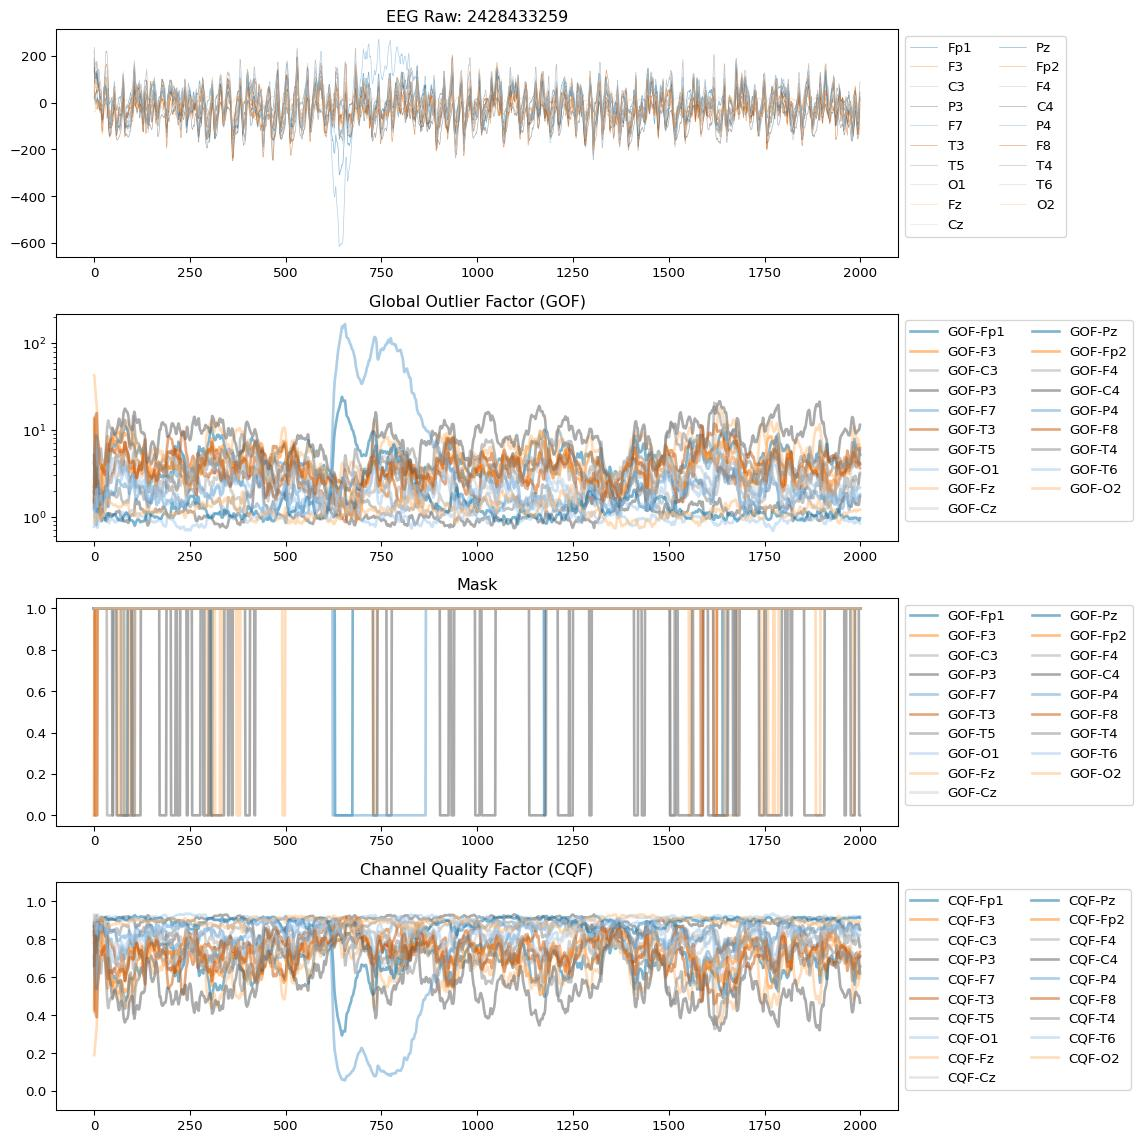

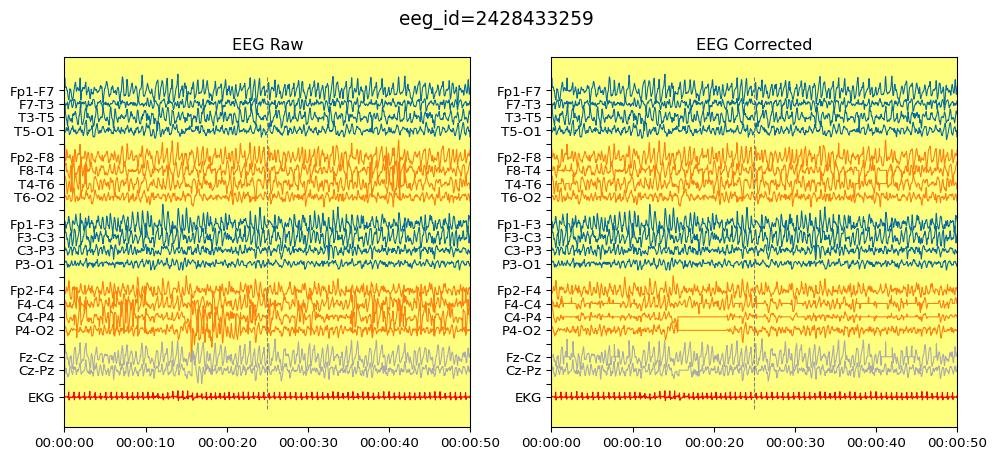

In [11]:
display_lqf_demo(2428433259, data_dir, offset_sec=3042)

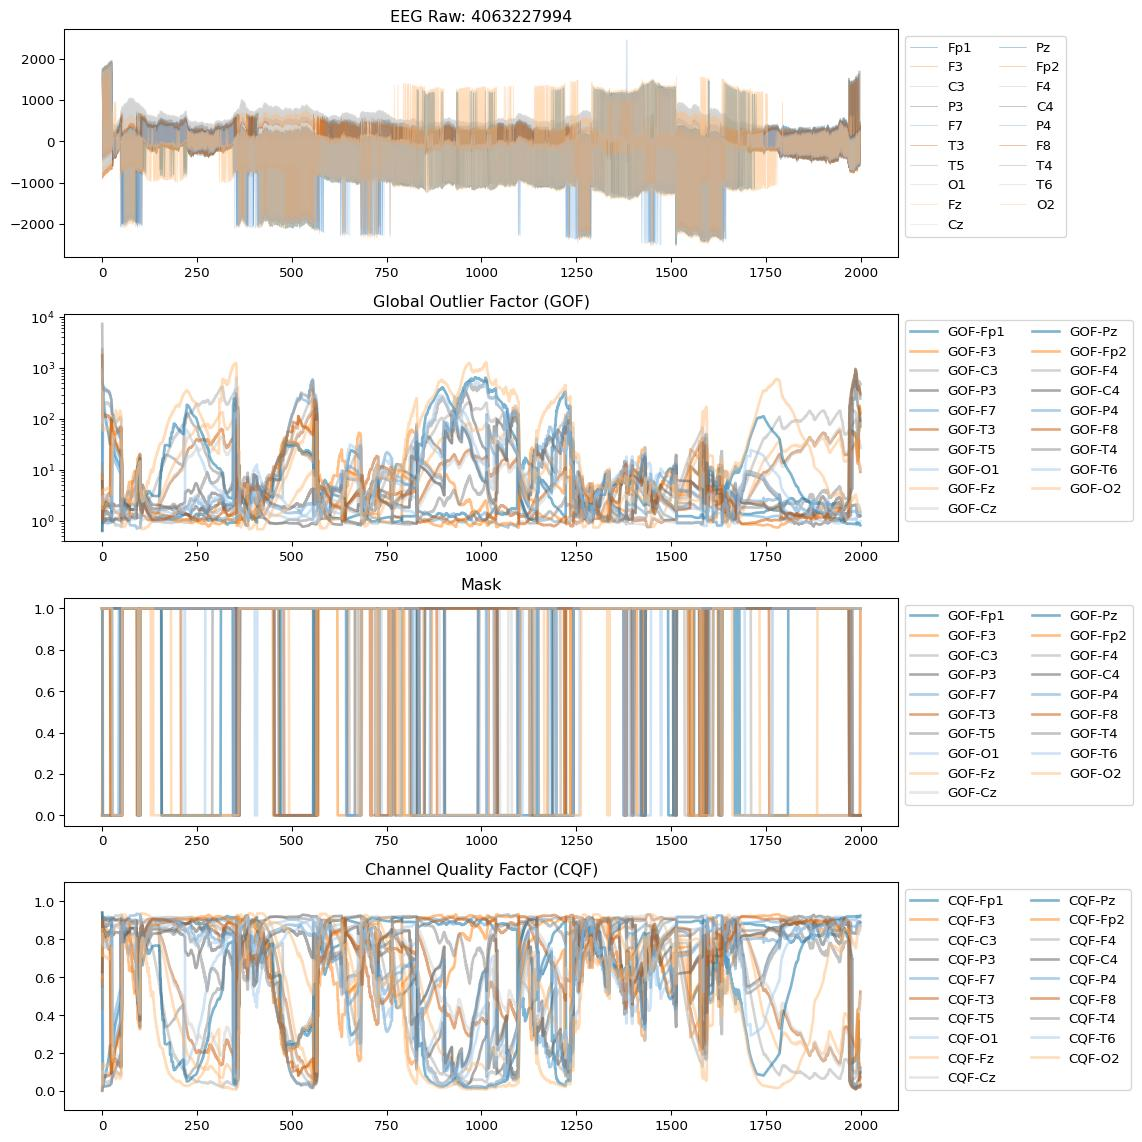

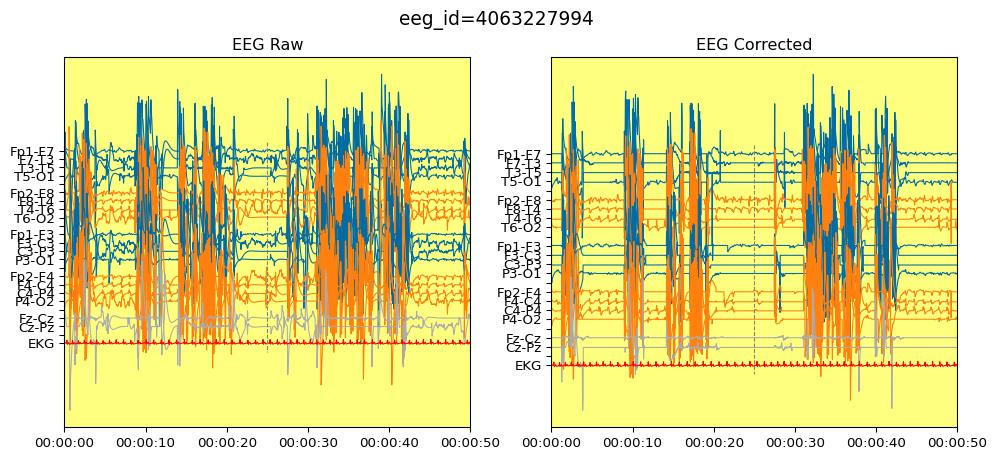

In [12]:
display_lqf_demo(4063227994, data_dir, offset_sec=12)

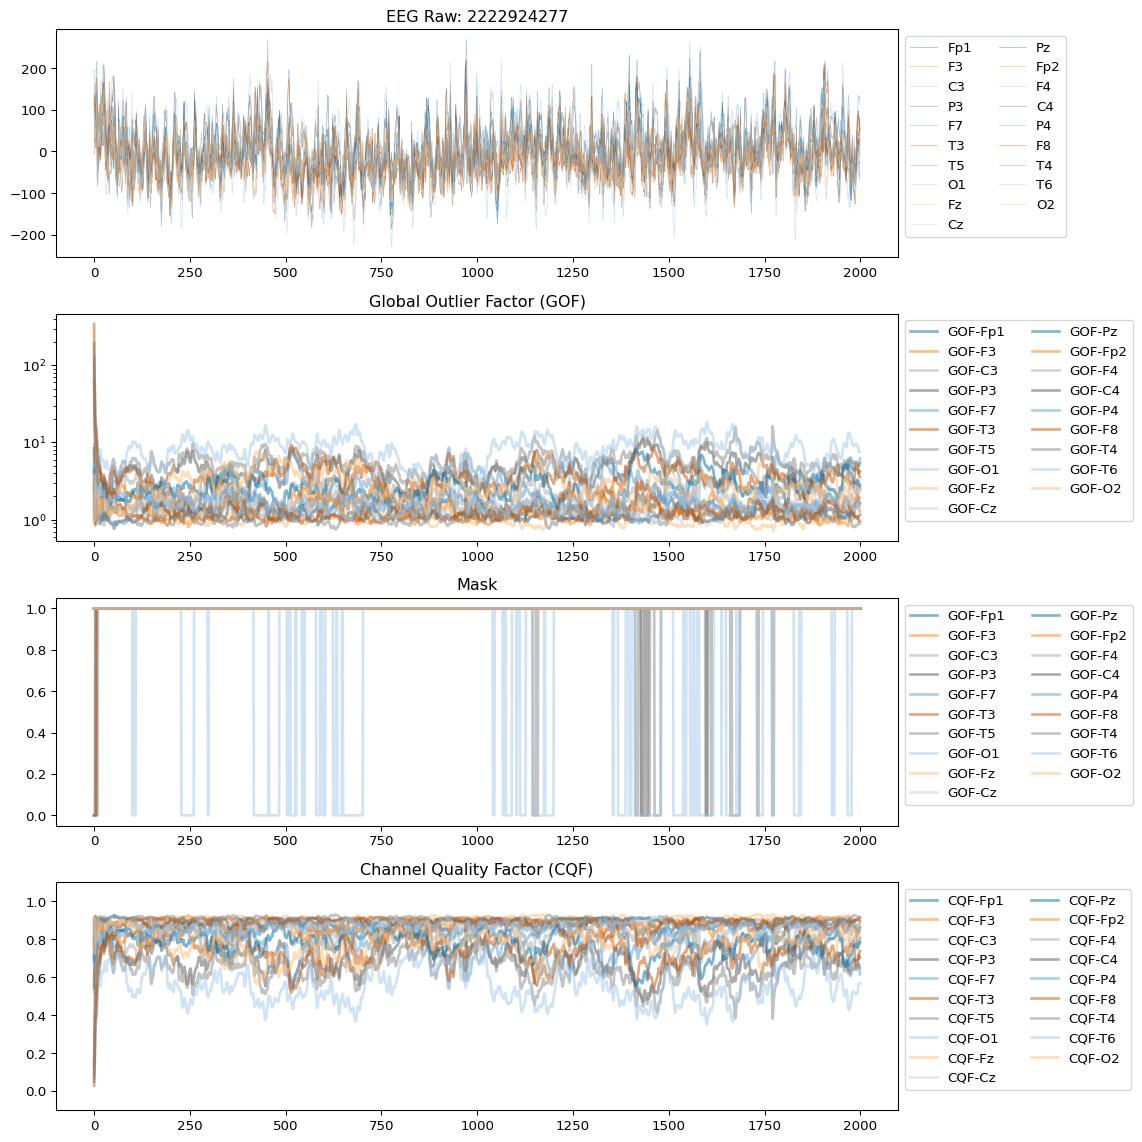

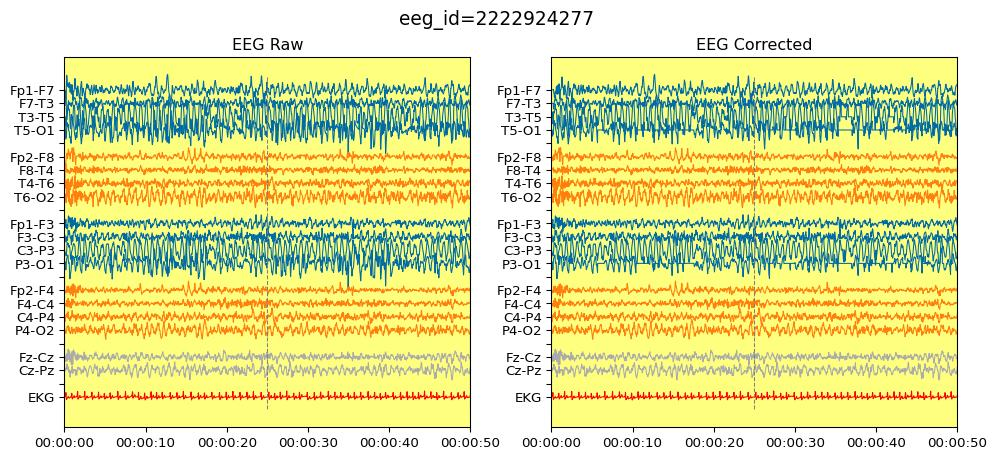

In [13]:
display_lqf_demo(2222924277, data_dir, offset_sec=112)

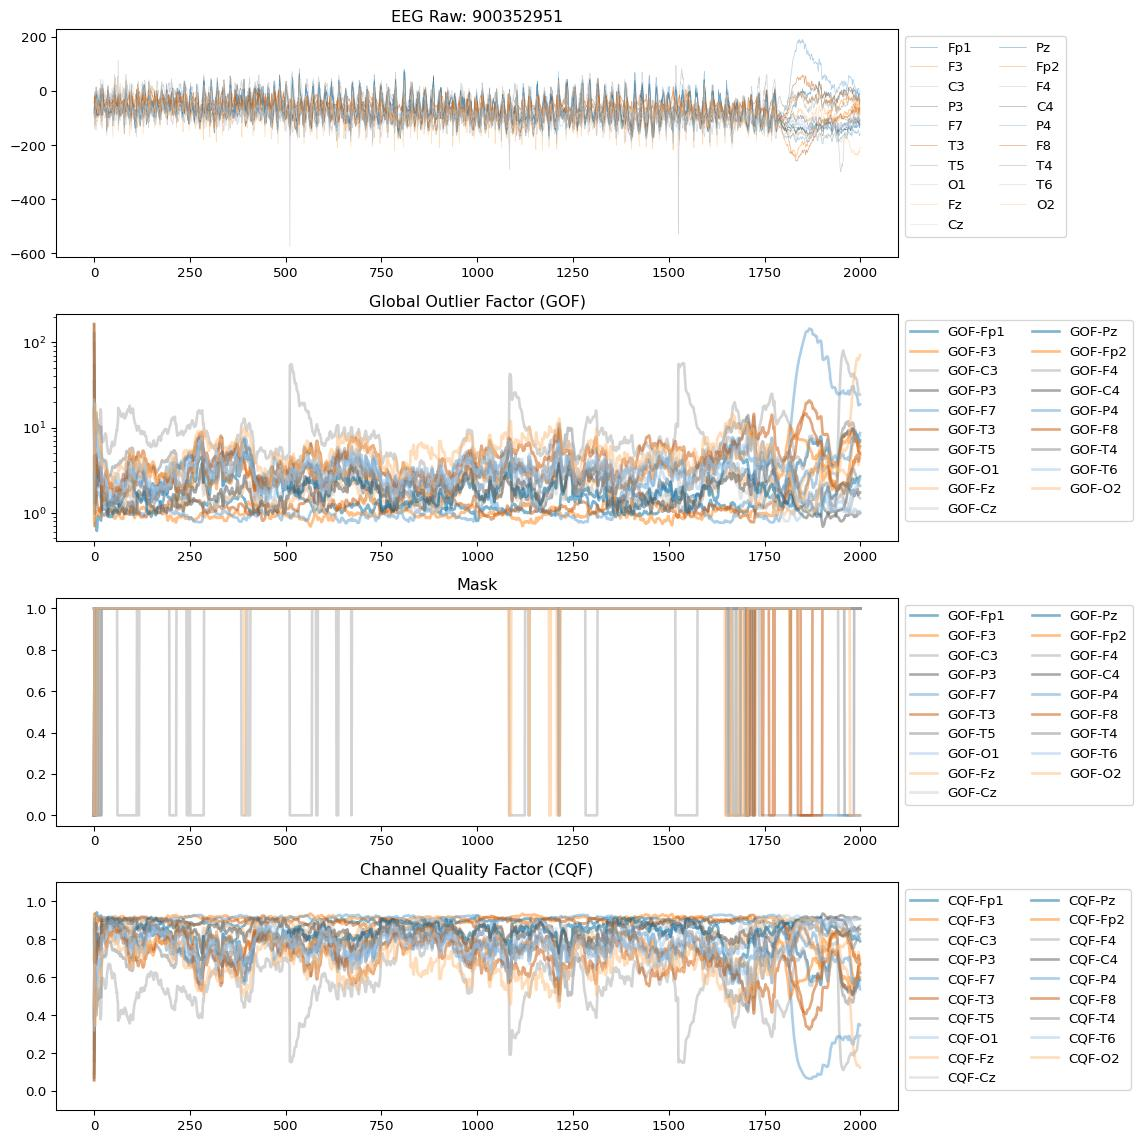

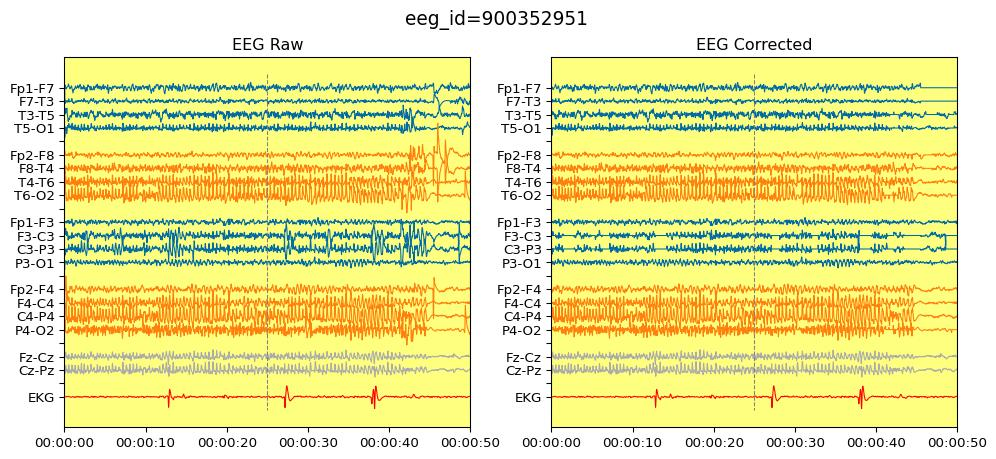

In [14]:
display_lqf_demo(900352951, data_dir, offset_sec=0)

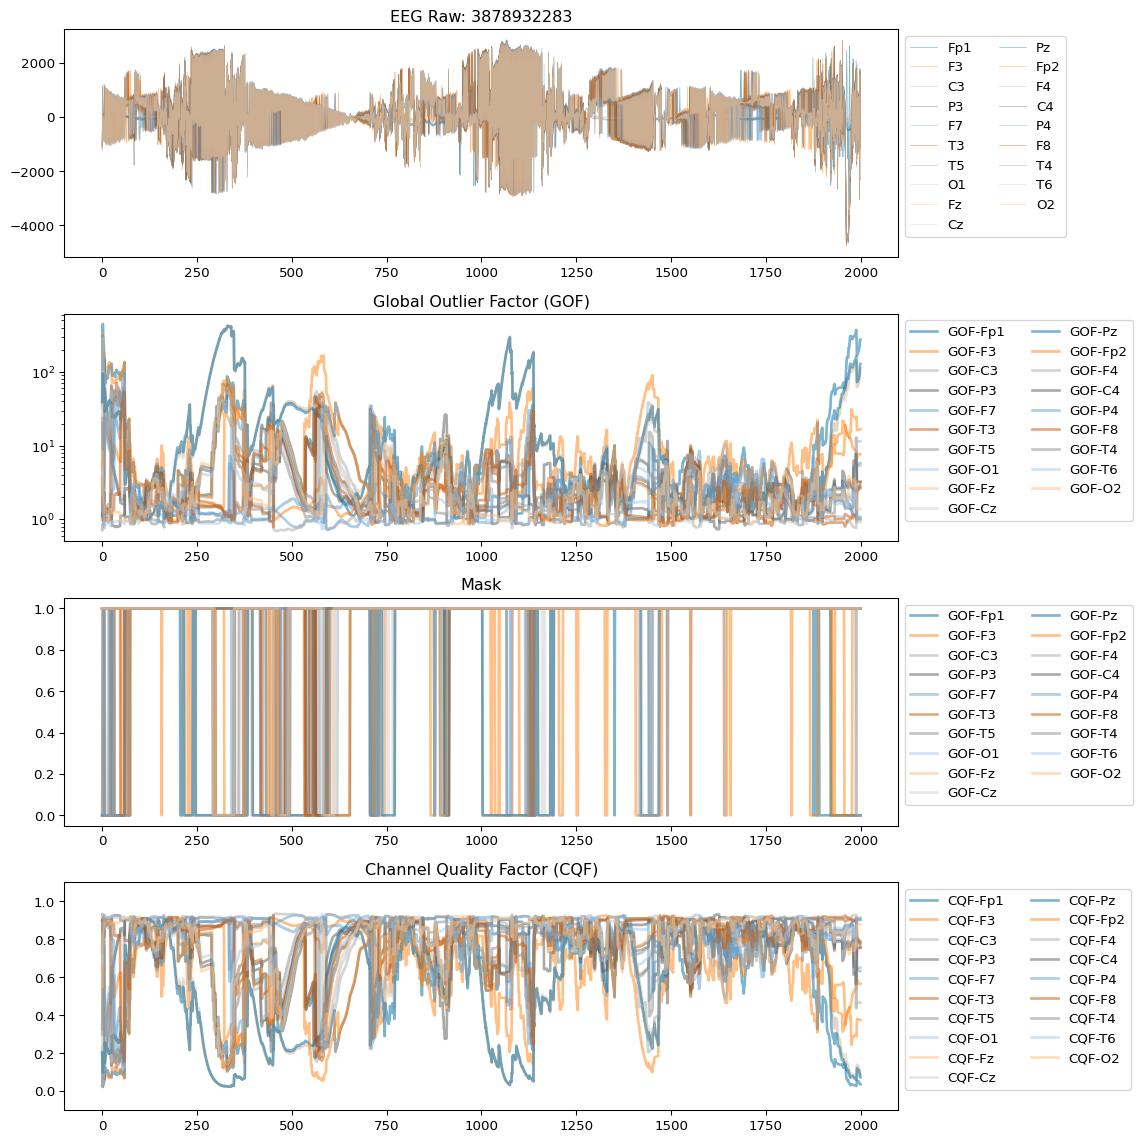

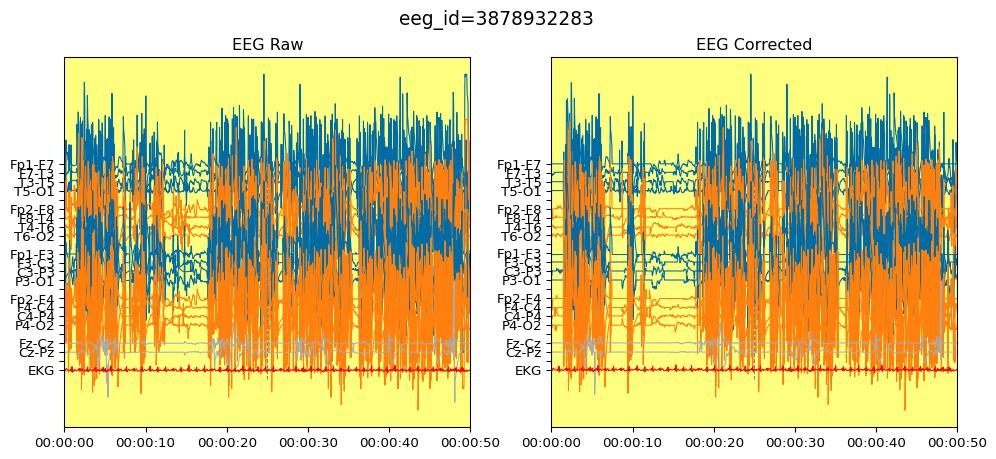

In [15]:
display_lqf_demo(3878932283, data_dir, offset_sec=14)